In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import h5py
import datetime
params = {'font.size':20,'font.family':'lmodern','xtick.labelsize':20, 'ytick.labelsize':20,}
plt.rcParams.update(params)

In [63]:
date = 20211105 # Date data was taken - adjust if multiple data sets per day
resistance = 1e8
volt_ohm = np.arange(0,100,0.00001)

2.644730246603589e-10
1.9835622727272726e-11


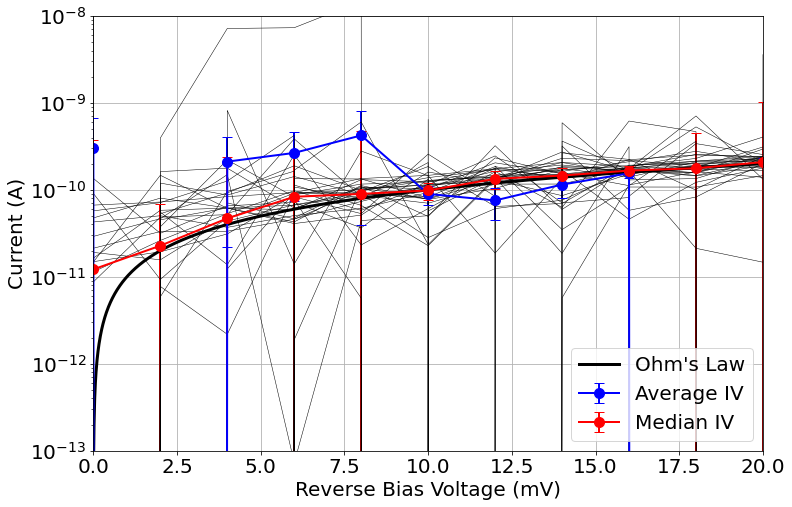

1.7585460058136368e-09
1.0370707272727273e-10


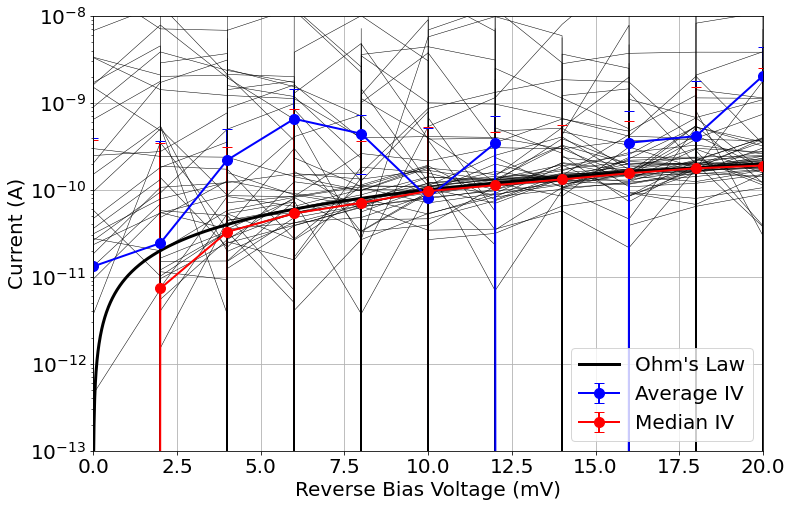

1.9303984168560603e-10
4.600648727272727e-11


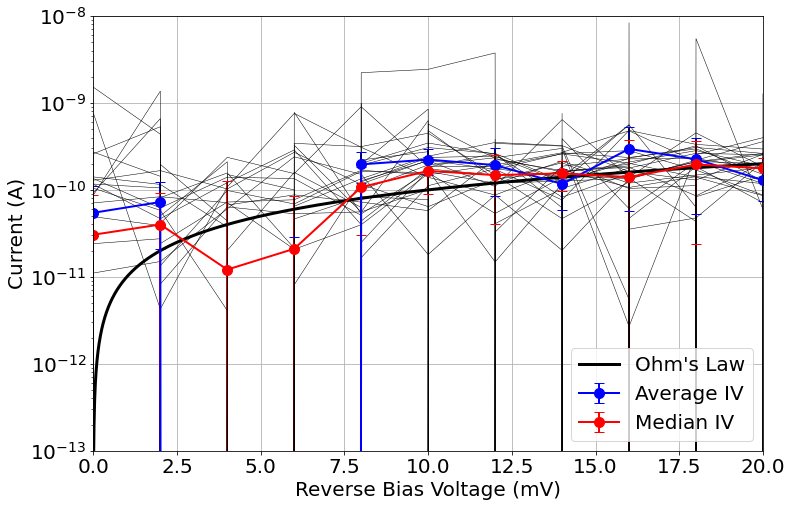

1.3236431410839162e-10
1.5643694090909088e-11


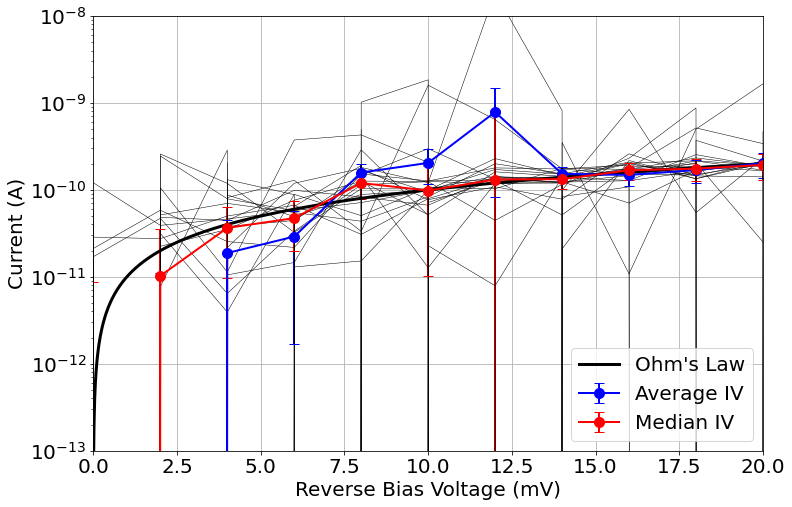

In [64]:
for PLC in ['_Resistor_2', "_Resistor_2_PLC2", "_Resistor_2_PLC3", "_Resistor_2_PLC6"]:
    fig = plt.figure(figsize=(12,8))
    # plt.title("I-V Characteristic for 100 MOhm Resistor")
    plt.xlabel('Reverse Bias Voltage (mV)')
    plt.ylabel('Current (A)')
    # plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.ylim(1e-13,1e-8)

    
    file = h5py.File('C:/Data/SiPM/FBK-HD3/' + str(date) + '{}.h5'.format(PLC),'r')

    data_all = []
    voltage = 0 
    for ii,group in enumerate(file.keys()):
        voltage = file[group]['Voltage'][:]*1000
        current = file[group]['Current'][:]
        data_all.append(np.array(current))
        plt.plot(voltage, current, lw=0.5, color='k')
    data_all = np.array(data_all)

    plt.errorbar(voltage, np.mean(data_all, axis=0), yerr = np.std(data_all, axis=0)/np.sqrt(len(data_all)),  label='Average IV', color='b', lw=2, capsize=5, ms=10, marker='o')
    plt.errorbar(voltage, np.median(data_all, axis=0), yerr = np.std(data_all, axis=0)/np.sqrt(len(data_all)),  label='Median IV', color='r', lw=2, capsize=5, ms=10, marker='o')
    diff1 =  np.abs(np.mean(np.abs(data_all), axis=0) -  (voltage/resistance/1000))
    diff2 =  np.abs(np.median(np.abs(data_all), axis=0) -  (voltage/resistance/1000))
    print(np.mean(diff1))
    print(np.mean(diff2))

    plt.xlim(0,np.max(voltage))
    plt.plot(volt_ohm*1000, volt_ohm/resistance, label='Ohm\'s Law', color='k', ls='-', lw=3)
    plt.legend(loc="lower right", ncol = 1)

    plt.show()
    file.close()